In [3]:
import pandas as pd
df = pd.read_pickle("Main_Director_COMPLETE.pkl")

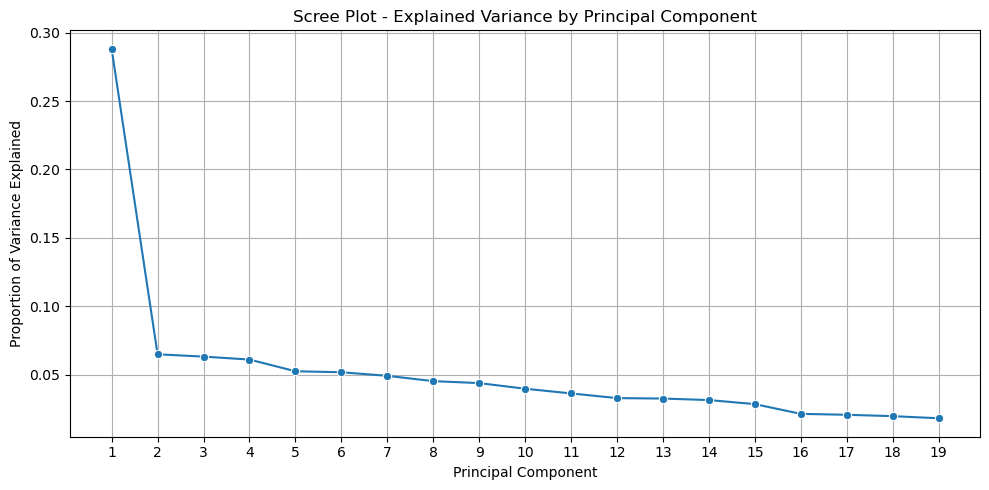

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
skillset_cols = [
    'Academic','combined_manufacturing_supply_chain',
    'combined_sustainability', 'combined_entrepreneurial', 'combined_compensation',
    'combined_governance', 'combined_government_policy', 'combined_international',
    'combined_legal','combined_leadership_outside_board',
    'combined_marketing', 'combined_risk_management', 'combined_scientific',
    'combined_strategic_planning', 'combined_conglomerate_experience',
    'combined_hr', 'combined_technology', 'combined_finance_accounting','Company Business'
]
X = df[skillset_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
sns.lineplot(
    x=range(1, len(pca_full.explained_variance_ratio_) + 1),
    y=pca_full.explained_variance_ratio_,
    marker="o"
)
plt.title("Scree Plot - Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

df['SkillsetIndex'] = principal_component[:, 0]
df['SkillsetIndex'] = (df['SkillsetIndex'] - df['SkillsetIndex'].mean()) / df['SkillsetIndex'].std()

median_value = df['SkillsetIndex'].median()
df['SkillsetGeneralistDummy'] = (df['SkillsetIndex'] > median_value).astype(int)

loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(len(skillset_cols))],
    index=skillset_cols
)

In [5]:
pc1_loadings = loadings[['PC1']].copy()
pc1_loadings['Skillset Feature'] = pc1_loadings.index
pc1_sorted = pc1_loadings.sort_values('PC1', ascending=False)


C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_844\3259851393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PC1', y='Skillset Feature', data=pc1_sorted, palette='coolwarm')


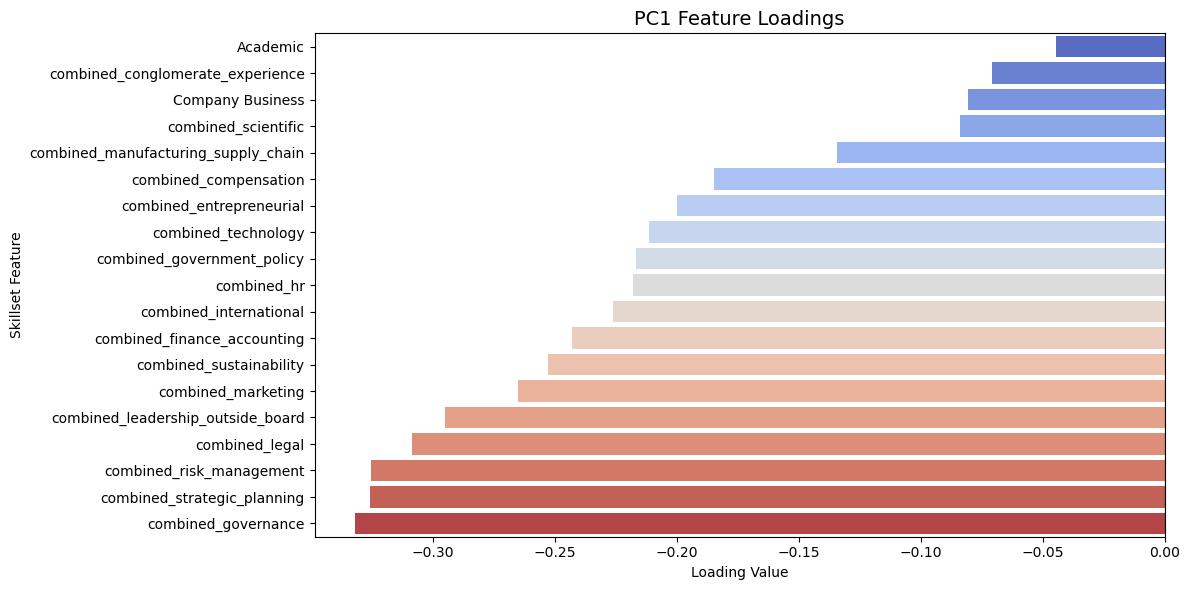

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PC1', y='Skillset Feature', data=pc1_sorted, palette='coolwarm')
plt.title('PC1 Feature Loadings', fontsize=14)
plt.xlabel('Loading Value')
plt.ylabel('Skillset Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


In [7]:
eigenvalue_pc1 = pca_full.explained_variance_[0]
explained_variance_ratio_pc1 = pca_full.explained_variance_ratio_[0]
cumulative_explained_variance_pc1 = pca_full.explained_variance_ratio_.cumsum()[0]

print(f"Eigenvalue for PC1: {eigenvalue_pc1:.3f}")
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio_pc1 * 100:.2f}%")
print(f"Cumulative Explained Variance Ratio up to PC1: {cumulative_explained_variance_pc1 * 100:.2f}%")

loadings_pc1 = loadings['PC1'].sort_values(key=lambda x: abs(x), ascending=False)
print("\nTop PC1 Loadings:")
print(loadings_pc1.round(3).head(21))


Eigenvalue for PC1: 12.175
Explained Variance Ratio for PC1: 64.08%
Cumulative Explained Variance Ratio up to PC1: 64.08%

Top PC1 Loadings:
Company Business                       0.276
combined_conglomerate_experience       0.272
combined_scientific                    0.266
combined_legal                         0.258
Academic                               0.257
combined_strategic_planning            0.255
combined_risk_management               0.251
combined_compensation                  0.247
combined_government_policy             0.240
combined_governance                    0.240
combined_sustainability                0.239
combined_international                 0.224
combined_entrepreneurial               0.218
combined_marketing                     0.216
combined_hr                            0.211
combined_manufacturing_supply_chain    0.193
combined_leadership_outside_board      0.183
combined_finance_accounting            0.122
combined_technology                    0.101
Name

In [8]:
eigenvalues_df = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(skillset_cols))],
     'Eigenvalue': pca_full.explained_variance_}
)

explained_variance_ratio_df = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(skillset_cols))],
     'Explained Variance Ratio (%)': pca_full.explained_variance_ratio_ * 100}
)

cumulative_explained_variance_df = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(skillset_cols))],
     'Cumulative Explained Variance Ratio (%)': pca_full.explained_variance_ratio_.cumsum() * 100}
)

loadings_df = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(len(skillset_cols))],
    index=skillset_cols
)

pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

df['SkillsetIndex'] = principal_component[:, 0]
df['SkillsetIndex'] = (df['SkillsetIndex'] - df['SkillsetIndex'].mean()) / df['SkillsetIndex'].std()

median_value = df['SkillsetIndex'].median()
df['SkillsetGeneralistDummy'] = (df['SkillsetIndex'] > median_value).astype(int)

In [9]:
eigenvalues_df 

,Principal Component,Eigenvalue
0,PC1,12.175346
1,PC2,1.392428
2,PC3,0.718610
3,PC4,0.602474
4,PC5,0.559061
5,PC6,0.481539
6,PC7,0.433391
7,PC8,0.427254
8,PC9,0.381739
9,PC10,0.317214


In [10]:
explained_variance_ratio_df

,Principal Component,Explained Variance Ratio (%)
0,PC1,64.080520
1,PC2,7.328542
2,PC3,3.782142
3,PC4,3.170906
4,PC5,2.942416
5,PC6,2.534404
6,PC7,2.280999
7,PC8,2.248698
8,PC9,2.009143
9,PC10,1.669543


In [11]:
cumulative_explained_variance_df

,Principal Component,Cumulative Explained Variance Ratio (%)
0,PC1,64.080520
1,PC2,71.409062
2,PC3,75.191204
3,PC4,78.362110
4,PC5,81.304525
5,PC6,83.838929
6,PC7,86.119928
7,PC8,88.368625
8,PC9,90.377768
9,PC10,92.047311


In [12]:
factor_scores = pd.DataFrame(
    X_pca_full,
    columns=[f'PC{i+1}' for i in range(X_pca_full.shape[1])],
    index=df.index 
)

df['PC1_FactorScore'] = factor_scores['PC1']


In [13]:
df['PC1_FactorScore'].to_csv("Factor_score.csv")

In [14]:
df['PC1_FactorScore']

0        -2.757197
1         5.190080
2         5.190080
3         5.190080
4         5.190080
            ...   
259426    0.854666
259427   -0.826504
259428    0.021229
259429   -2.438896
259430   -3.191826
Name: PC1_FactorScore, Length: 259431, dtype: float64

In [15]:
df.count()

Unnamed: 0                           259431
Symbol                               259431
Company                              259431
AsOnDate                             259431
AsOnYear                             259431
                                      ...  
Company Business                     259431
combined_leadership_outside_board    259431
SkillsetIndex                        259431
SkillsetGeneralistDummy              259431
PC1_FactorScore                      259431
Length: 220, dtype: int64

In [16]:
df['PC1_FactorScore'].describe()


count    2.594310e+05
mean     6.531173e-15
std      3.489319e+00
min     -3.840287e+00
25%     -2.754962e+00
50%     -1.725727e+00
75%      5.190080e+00
max      5.190080e+00
Name: PC1_FactorScore, dtype: float64

In [17]:
df.describe()

,Unnamed: 0,AsOnYear,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,...,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,Academic,Company Business,combined_leadership_outside_board,SkillsetIndex,SkillsetGeneralistDummy,PC1_FactorScore
count,259431.00000,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.0,259431.0,259431.0,...,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,2.594310e+05,259431.000000,2.594310e+05
mean,129715.00000,2016.233496,0.198858,0.003739,0.198920,1.012154,0.113363,0.0,0.0,0.0,...,0.376829,0.323057,0.353107,0.522702,0.337234,0.295844,0.544507,-1.270827e-17,0.499998,6.531173e-15
std,74891.42318,5.312919,0.399142,0.061033,0.399188,0.110308,0.317037,0.0,0.0,0.0,...,0.484592,0.467645,0.477937,0.499485,0.472766,0.456422,0.498016,1.000000e+00,0.500001,3.489319e+00
min,0.00000,2006.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.100584e+00,0.000000,-3.840287e+00
25%,64857.50000,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.895416e-01,0.000000,-2.754962e+00
50%,129715.00000,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-4.945741e-01,0.000000,-1.725727e+00
75%,194572.50000,2021.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.487419e+00,1.000000,5.190080e+00
max,259430.00000,2024.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.487419e+00,1.000000,5.190080e+00


In [18]:
df

,Unnamed: 0,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,...,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,Academic,Company Business,combined_leadership_outside_board,SkillsetIndex,SkillsetGeneralistDummy,PC1_FactorScore
0,0,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033272,MR.,SHANKARANARAYANA,VISHWANATHA RAO,...,0,0,0,0,0,0,0,-0.790182,0,-2.757197
1,1,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1,1.487419,1,5.190080
2,2,ASHOKLEY,ASHOK LEYLAND LTD.,2006-03-31,2006,INE208A01029,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1,1.487419,1,5.190080
3,3,BAJAJHLDNG,BAJAJ HOLDINGS & INVESTMENT LTD.,2006-03-31,2006,INE118A01012,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1,1.487419,1,5.190080
4,4,GRAPHITE,GRAPHITE INDIA LTD.,2006-03-31,2006,INE371A01025,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1,1.487419,1,5.190080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259426,259426,ZYDUSLIFE,ZYDUS LIFESCIENCES LTD.,2024-03-31,2024,INE010B01027,P00013240,DR.(MR.),SHARVIL,PANKAJ,...,1,0,0,1,1,0,1,0.244938,1,0.854666
259427,259427,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00013240,DR.(MR.),SHARVIL,PANKAJ,...,1,0,0,0,1,0,1,-0.236867,1,-0.826504
259428,259428,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00071607,MR.,TARUN,GIAN,...,0,1,1,1,0,0,1,0.006084,1,0.021229
259429,259429,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00091934,MR.,ASHISH,NaN,...,0,0,0,1,0,0,1,-0.698960,0,-2.438896


In [19]:
df['PC1_FactorScore'].mean()



6.531172563814522e-15

In [20]:
df['PC1_FactorScore'].std()

3.4893188150700167

In [21]:
df['PC1_FactorScore_Standardised'] = (
    df['PC1_FactorScore'] - df['PC1_FactorScore'].mean()
) / df['PC1_FactorScore'].std()


In [22]:
df['PC1_FactorScore_Standardised'].mean()
df['PC1_FactorScore_Standardised'].std()


1.000000000000026

In [23]:
df

,Unnamed: 0,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,...,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,Academic,Company Business,combined_leadership_outside_board,SkillsetIndex,SkillsetGeneralistDummy,PC1_FactorScore,PC1_FactorScore_Standardised
0,0,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033272,MR.,SHANKARANARAYANA,VISHWANATHA RAO,...,0,0,0,0,0,0,-0.790182,0,-2.757197,-0.790182
1,1,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
2,2,ASHOKLEY,ASHOK LEYLAND LTD.,2006-03-31,2006,INE208A01029,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
3,3,BAJAJHLDNG,BAJAJ HOLDINGS & INVESTMENT LTD.,2006-03-31,2006,INE118A01012,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
4,4,GRAPHITE,GRAPHITE INDIA LTD.,2006-03-31,2006,INE371A01025,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259426,259426,ZYDUSLIFE,ZYDUS LIFESCIENCES LTD.,2024-03-31,2024,INE010B01027,P00013240,DR.(MR.),SHARVIL,PANKAJ,...,0,0,1,1,0,1,0.244938,1,0.854666,0.244938
259427,259427,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00013240,DR.(MR.),SHARVIL,PANKAJ,...,0,0,0,1,0,1,-0.236867,1,-0.826504,-0.236867
259428,259428,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00071607,MR.,TARUN,GIAN,...,1,1,1,0,0,1,0.006084,1,0.021229,0.006084
259429,259429,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00091934,MR.,ASHISH,NaN,...,0,0,1,0,0,1,-0.698960,0,-2.438896,-0.698960


In [24]:
df['PC1_FactorScore_Standardised'].describe()

count    2.594310e+05
mean     4.951842e-17
std      1.000000e+00
min     -1.100584e+00
25%     -7.895416e-01
50%     -4.945741e-01
75%      1.487419e+00
max      1.487419e+00
Name: PC1_FactorScore_Standardised, dtype: float64

In [25]:
df['SkillsetIndex'] = (df['SkillsetIndex'] - df['SkillsetIndex'].mean()) / df['SkillsetIndex'].std()


In [26]:
df['SkillsetIndex'] 

0        -0.790182
1         1.487419
2         1.487419
3         1.487419
4         1.487419
            ...   
259426    0.244938
259427   -0.236867
259428    0.006084
259429   -0.698960
259430   -0.914742
Name: SkillsetIndex, Length: 259431, dtype: float64

In [31]:
print(df.columns.tolist())

['Symbol', 'Company', 'AsOnDate', 'AsOnYear', 'ISIN', 'Person Code', 'Director Salutation', 'Director First Name', 'Director Middle Name', 'Director Surname', 'Date of Birth', 'Gender', 'Nationality', 'Member of Civil Services', 'Promoter Director (Yes/No)', 'Position on Board', 'Independent (Yes/No)', 'Education1', 'Education2', 'Education3', 'Education4', 'Education5', 'Education6', 'Education7', 'Education8', 'Education9', 'Education10', 'Skills/Competencies', 'Occupation', 'Cessation Reason', 'Other Directorship 1', 'Other Directorship 2', 'Other Directorship 3', 'Other Directorship 4', 'Other Directorship 5', 'Other Directorship 6', 'Other Directorship 7', 'Other Directorship 8', 'Other Directorship 9', 'Other Directorship 10', 'Other Directorship 11', 'Other Directorship 12', 'Other Directorship 13', 'Other Directorship 14', 'Other Directorship 15', 'Brief Profile', 'Tenure Valid till', 'Indep', 'Appointment Date', 'Cessation Date', 'PrevLastServed', 'NextServed', 'CessationDummy

In [29]:
df = df.drop(columns=["Unnamed: 0"])


In [30]:
df.to_csv("Main_Director_Complete_Skillsets_PCA.csv")

In [32]:
df.head(20)

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,...,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,Academic,Company Business,combined_leadership_outside_board,SkillsetIndex,SkillsetGeneralistDummy,PC1_FactorScore,PC1_FactorScore_Standardised
0,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033272,MR.,SHANKARANARAYANA,VISHWANATHA RAO,BANAWARA,...,0,0,0,0,0,0,-0.790182,0,-2.757197,-0.790182
1,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
2,ASHOKLEY,ASHOK LEYLAND LTD.,2006-03-31,2006,INE208A01029,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
3,BAJAJHLDNG,BAJAJ HOLDINGS & INVESTMENT LTD.,2006-03-31,2006,INE118A01012,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
4,GRAPHITE,GRAPHITE INDIA LTD.,2006-03-31,2006,INE371A01025,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
5,SEAMECLTD,SEAMEC LTD.,2006-03-31,2006,INE497B01018,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
6,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033331,MR.,BALASUBRAMANIAM,SOMASKANDAN,IYER,...,0,0,0,0,0,0,-0.758264,0,-2.645824,-0.758264
7,3PLAND,3P LAND HOLDINGS LTD.,2006-03-31,2006,INE105C01023,P00022755,LATE MR.,SHAHRUKH,MINOCHER,CONTRACTOR,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
8,3PLAND,3P LAND HOLDINGS LTD.,2006-03-31,2006,INE105C01023,P00012704,MR.,ATUL,SHANTIKUMAR,DAYAL,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419
9,GAMMONIND,GAMMON INDIA LTD.,2006-03-31,2006,INE259B01020,P00012704,MR.,ATUL,SHANTIKUMAR,DAYAL,...,1,1,1,1,1,1,1.487419,1,5.190080,1.487419


In [33]:
df2 = pd.read_csv("Main_Firm_Fin_Loc_with_Absence.csv")

/var/folders/cj/n529ywcn2tv783ff08sl87pm0000gn/T/ipykernel_74908/2309918900.py:1: DtypeWarning: Columns (14,15,16,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,50,51,196) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Main_Firm_Fin_Loc_with_Absence.csv")


In [55]:
df2

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,...,General Ability Index_2013,General Ability Index_scaled_2013,FactorLoading1_2013,FactorLoading2_2013,FactorLoading3_2013,FactorLoading4_2013,FactorLoading5_2013,Eigenvalue2013,Meetings absent (%),FactorScore_avg
0,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033272,MR.,SHANKARANARAYANA,VISHWANATHA RAO,BANAWARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020342
1,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020342
2,ASHOKLEY,ASHOK LEYLAND LTD.,2006-03-31,2006,INE208A01029,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190628
3,BAJAJHLDNG,BAJAJ HOLDINGS & INVESTMENT LTD.,2006-03-31,2006,INE118A01012,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.487419
4,GRAPHITE,GRAPHITE INDIA LTD.,2006-03-31,2006,INE371A01025,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.401508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259426,ZYDUSLIFE,ZYDUS LIFESCIENCES LTD.,2024-03-31,2024,INE010B01027,P00013240,DR.(MR.),SHARVIL,PANKAJ,PATEL,...,1.117739,0.713026,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,0.005898
259427,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00013240,DR.(MR.),SHARVIL,PANKAJ,PATEL,...,1.117739,0.713026,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099
259428,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00071607,MR.,TARUN,GIAN,ARORA,...,-0.500512,-0.319286,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099
259429,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00091934,MR.,ASHISH,NaN,BHARGAVA,...,-0.573829,-0.366056,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099


In [34]:
df2.columns.tolist()

['Symbol',
 'Company',
 'AsOnDate',
 'AsOnYear',
 'ISIN',
 'Person Code',
 'Director Salutation',
 'Director First Name',
 'Director Middle Name',
 'Director Surname',
 'Date of Birth',
 'Gender',
 'Nationality',
 'Member of Civil Services',
 'Promoter Director (Yes/No)',
 'Position on Board',
 'Independent (Yes/No)',
 'Education1',
 'Education2',
 'Education3',
 'Education4',
 'Education5',
 'Education6',
 'Education7',
 'Education8',
 'Education9',
 'Education10',
 'Skills/Competencies',
 'Occupation',
 'Cessation Reason',
 'Other Directorship 1',
 'Other Directorship 2',
 'Other Directorship 3',
 'Other Directorship 4',
 'Other Directorship 5',
 'Other Directorship 6',
 'Other Directorship 7',
 'Other Directorship 8',
 'Other Directorship 9',
 'Other Directorship 10',
 'Other Directorship 11',
 'Other Directorship 12',
 'Other Directorship 13',
 'Other Directorship 14',
 'Other Directorship 15',
 'Brief Profile',
 'Tenure Valid till',
 'Indep',
 'Appointment Date',
 'Cessation Date'

In [35]:
df_avg = df.groupby(['Symbol', 'AsOnDate'])['PC1_FactorScore_Standardised'].mean().reset_index()

df_avg.rename(columns={'PC1_FactorScore_Standardised': 'FactorScore_avg'}, inplace=True)

df2 = df2.merge(df_avg, on=['Symbol', 'AsOnDate'], how='left')

In [39]:
df_avg.head(50)

,Symbol,AsOnDate,FactorScore_avg
0,20MICRONS,2009-03-31,-0.669449
1,20MICRONS,2010-03-31,-0.671691
2,20MICRONS,2011-03-31,-0.657724
3,20MICRONS,2012-03-31,-0.697984
4,20MICRONS,2013-03-31,-0.670369
5,20MICRONS,2014-03-31,-0.670369
6,20MICRONS,2015-03-31,-0.598873
7,20MICRONS,2016-03-31,-0.554812
8,20MICRONS,2017-03-31,-0.554812
9,20MICRONS,2018-03-31,-0.564515


In [41]:
df2.head(60)

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,...,General Ability Index_2013,General Ability Index_scaled_2013,FactorLoading1_2013,FactorLoading2_2013,FactorLoading3_2013,FactorLoading4_2013,FactorLoading5_2013,Eigenvalue2013,Meetings absent (%),FactorScore_avg
0,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033272,MR.,SHANKARANARAYANA,VISHWANATHA RAO,BANAWARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020342
1,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020342
2,ASHOKLEY,ASHOK LEYLAND LTD.,2006-03-31,2006,INE208A01029,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190628
3,BAJAJHLDNG,BAJAJ HOLDINGS & INVESTMENT LTD.,2006-03-31,2006,INE118A01012,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.487419
4,GRAPHITE,GRAPHITE INDIA LTD.,2006-03-31,2006,INE371A01025,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.401508
5,SEAMECLTD,SEAMEC LTD.,2006-03-31,2006,INE497B01018,P00000249,LATE MR.,BALAJI RAO,JAGANNATH RAO,DOVETON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.398638
6,3MINDIA,3M INDIA LTD.,2006-03-31,2006,INE470A01017,P00033331,MR.,BALASUBRAMANIAM,SOMASKANDAN,IYER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020342
7,3PLAND,3P LAND HOLDINGS LTD.,2006-03-31,2006,INE105C01023,P00022755,LATE MR.,SHAHRUKH,MINOCHER,CONTRACTOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.487419
8,3PLAND,3P LAND HOLDINGS LTD.,2006-03-31,2006,INE105C01023,P00012704,MR.,ATUL,SHANTIKUMAR,DAYAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.487419
9,GAMMONIND,GAMMON INDIA LTD.,2006-03-31,2006,INE259B01020,P00012704,MR.,ATUL,SHANTIKUMAR,DAYAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.650452


In [57]:
df2['FactorScore_avg'].describe()

count    2.594310e+05
mean     5.170950e-17
std      8.005344e-01
min     -1.100584e+00
25%     -5.968058e-01
50%     -2.876787e-01
75%      3.254316e-01
max      1.487419e+00
Name: FactorScore_avg, dtype: float64

In [48]:
df2.describe()

,AsOnYear,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,...,HasConglomerateXPScaled_2013,General Ability Index_2013,General Ability Index_scaled_2013,FactorLoading1_2013,FactorLoading2_2013,FactorLoading3_2013,FactorLoading4_2013,FactorLoading5_2013,Eigenvalue2013,FactorScore_avg
count,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.000000,259431.0,259431.0,259431.0,258437.000000,...,186318.000000,186318.000000,186318.000000,1.863180e+05,1.863180e+05,1.863180e+05,1.863180e+05,1.863180e+05,1.863180e+05,2.594310e+05
mean,2016.233496,0.198858,0.003739,0.198920,1.012154,0.113363,0.0,0.0,0.0,335.534885,...,-0.000059,-0.000007,-0.000004,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,5.170950e-17
std,5.312919,0.399142,0.061033,0.399188,0.110308,0.317037,0.0,0.0,0.0,1150.266002,...,1.000037,1.567651,1.000033,5.849781e-13,1.183390e-12,4.878333e-13,1.607746e-13,1.421922e-12,5.956140e-12,8.005344e-01
min,2006.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,-4433.000000,...,-1.735585,-2.114378,-1.348800,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-1.100584e+00
25%,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.576175,-0.867094,-0.553135,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-5.968058e-01
50%,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.576175,-0.353880,-0.225746,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-2.876787e-01
75%,2021.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,365.000000,...,0.576175,0.483948,0.308719,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,3.254316e-01
max,2024.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,0.0,0.0,23961.000000,...,0.576175,12.180721,7.770301,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,1.487419e+00


In [56]:
df_avg['FactorScore_avg'].describe()

count    28909.000000
mean        -0.025257
std          0.807552
min         -1.100584
25%         -0.624386
50%         -0.317984
75%          0.288664
max          1.487419
Name: FactorScore_avg, dtype: float64

In [59]:
df2.columns.tolist()

['Symbol',
 'Company',
 'AsOnDate',
 'AsOnYear',
 'ISIN',
 'Person Code',
 'Director Salutation',
 'Director First Name',
 'Director Middle Name',
 'Director Surname',
 'Date of Birth',
 'Gender',
 'Nationality',
 'Member of Civil Services',
 'Promoter Director (Yes/No)',
 'Position on Board',
 'Independent (Yes/No)',
 'Education1',
 'Education2',
 'Education3',
 'Education4',
 'Education5',
 'Education6',
 'Education7',
 'Education8',
 'Education9',
 'Education10',
 'Skills/Competencies',
 'Occupation',
 'Cessation Reason',
 'Other Directorship 1',
 'Other Directorship 2',
 'Other Directorship 3',
 'Other Directorship 4',
 'Other Directorship 5',
 'Other Directorship 6',
 'Other Directorship 7',
 'Other Directorship 8',
 'Other Directorship 9',
 'Other Directorship 10',
 'Other Directorship 11',
 'Other Directorship 12',
 'Other Directorship 13',
 'Other Directorship 14',
 'Other Directorship 15',
 'Brief Profile',
 'Tenure Valid till',
 'Indep',
 'Appointment Date',
 'Cessation Date'

In [60]:

df2['AsOnYear'] = pd.to_numeric(df2['AsOnYear'], errors='coerce')

df2_filtered = df2[df2['AsOnYear'] >= 2015]




In [61]:
df2_filtered

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,...,General Ability Index_2013,General Ability Index_scaled_2013,FactorLoading1_2013,FactorLoading2_2013,FactorLoading3_2013,FactorLoading4_2013,FactorLoading5_2013,Eigenvalue2013,Meetings absent (%),FactorScore_avg
100444,20MICRONS,20 MICRONS LTD.,2015-03-31,2015,INE144J01027,P00027633,MR.,RAMKISHAN,AMIRCHAND,DEVIDAYAL,...,1.290281,0.823093,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.598873
100445,BANCOINDIA,BANCO PRODUCTS (INDIA) LTD.,2015-03-31,2015,INE213C01025,P00027633,MR.,RAMKISHAN,AMIRCHAND,DEVIDAYAL,...,1.290281,0.823093,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.684370
100446,MUNJALAU,MUNJAL AUTO INDUSTRIES LTD.,2015-03-31,2015,INE672B01032,P00027633,MR.,RAMKISHAN,AMIRCHAND,DEVIDAYAL,...,1.290281,0.823093,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.590010
100447,20MICRONS,20 MICRONS LTD.,2015-03-31,2015,INE144J01027,P00064917,MS.,DARSHA,RAJESH,KIKANI,...,-0.516113,-0.329238,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,25,-0.598873
100448,20MICRONS,20 MICRONS LTD.,2015-03-31,2015,INE144J01027,P00042601,MR.,NARESH,S.,MAKHIJA,...,-0.867094,-0.553135,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,75,-0.598873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259426,ZYDUSLIFE,ZYDUS LIFESCIENCES LTD.,2024-03-31,2024,INE010B01027,P00013240,DR.(MR.),SHARVIL,PANKAJ,PATEL,...,1.117739,0.713026,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,0.005898
259427,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00013240,DR.(MR.),SHARVIL,PANKAJ,PATEL,...,1.117739,0.713026,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099
259428,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00071607,MR.,TARUN,GIAN,ARORA,...,-0.500512,-0.319286,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099
259429,ZYDUSWELL,ZYDUS WELLNESS LTD.,2024-03-31,2024,INE768C01010,P00091934,MR.,ASHISH,NaN,BHARGAVA,...,-0.573829,-0.366056,0.414736,0.601062,0.601053,0.124114,0.300081,2.412271,0,-0.274099


In [62]:
df2_filtered.describe()

,AsOnYear,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,...,HasConglomerateXPScaled_2013,General Ability Index_2013,General Ability Index_scaled_2013,FactorLoading1_2013,FactorLoading2_2013,FactorLoading3_2013,FactorLoading4_2013,FactorLoading5_2013,Eigenvalue2013,FactorScore_avg
count,158987.000000,158987.000000,158987.000000,158987.000000,158987.000000,158987.000000,158987.0,158987.0,158987.0,158640.000000,...,158987.000000,158987.000000,158987.000000,1.589870e+05,1.589870e+05,1.589870e+05,1.589870e+05,1.589870e+05,1.589870e+05,158987.000000
mean,2019.849346,0.254625,0.005221,0.184241,1.018215,0.117513,0.0,0.0,0.0,196.639889,...,0.001445,0.023788,0.015175,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,0.041791
std,2.906042,0.435651,0.072065,0.387682,0.134714,0.322031,0.0,0.0,0.0,976.009002,...,0.999164,1.570153,1.001629,1.384675e-12,6.231701e-13,6.117348e-14,4.693483e-14,1.055714e-12,3.220545e-12,0.778557
min,2015.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,-4433.000000,...,-1.735585,-2.114378,-1.348800,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-1.100584
25%,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.576175,-0.867094,-0.553135,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-0.548010
50%,2020.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.576175,-0.338279,-0.215794,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,-0.224982
75%,2022.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.576175,0.531354,0.338961,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,0.374894
max,2024.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,0.0,0.0,23674.000000,...,0.576175,12.180721,7.770301,4.147365e-01,6.010625e-01,6.010532e-01,1.241140e-01,3.000806e-01,2.412271e+00,1.487419


In [63]:
df2_filtered['FactorScore_avg'].describe()

count    158987.000000
mean          0.041791
std           0.778557
min          -1.100584
25%          -0.548010
50%          -0.224982
75%           0.374894
max           1.487419
Name: FactorScore_avg, dtype: float64

In [68]:
firm_year_count = df2_filtered[['Company', 'AsOnYear']].drop_duplicates().shape[0]
print("Unique firm-year combinations:", firm_year_count)


Unique firm-year combinations: 17699


In [69]:
unique_firm_years = df2_filtered[['Company', 'AsOnYear', 'FactorScore_avg']].drop_duplicates(subset=['Company', 'AsOnYear'])

unique_firm_years['FactorScore_avg'].describe()



count    17699.000000
mean         0.016387
std          0.783164
min         -1.100584
25%         -0.573059
50%         -0.254671
75%          0.338068
max          1.487419
Name: FactorScore_avg, dtype: float64